<a href="https://colab.research.google.com/github/jeric250/Data-Science-Projects/blob/main/Deep_Learning_Backpropagation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Build a Simple, Custom Network with Backpropagation</h3>

The objective is to build backpropagation and optimizers for update of weights from scratch for a simple network using a fictional dataset. The optimizers are standard gradient descent, momentum based gradient descent and Adam. 

The MLP inspired network architecture can be found in the image below. 

This is partly inspired by the course work from the Applied Roots's [Applied Machine Learning course](https://www.appliedaicourse.com/course/11/Applied-Machine-learning-course).

<img src='https://i.imgur.com/seSGbNS.png'>

In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/Data/data_backpro.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


## <font color='blue'>Part 1: Implementing Forward Propagation, Backpropagation</font>

<h4>1.1 Forward Propagation</h4>

In [ ]:
def sigmoid(z):
    '''Compute the sigmoid of a given value z'''
    return 1/(1+np.exp(-z))

In [ ]:
def forward_propagation(x, y, w):
        '''Compute the forward propagation according to custom NN'''
        # x: input data point (1 record/row)
        # y: output varible
        # w: weight array (of length 9 since there are 9 weights)

        # breakdown forward prop into 3 sections: (1) compute until exp, (2) compute until tanh, (3) compute until sigmoid
        val_1 = (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        
        val_2 = part_1 + w[6]
        part_2 = np.tanh(val_2)

        val_3 = np.sin(w[2]*x[2])*(w[3]*x[3] + w[4]*x[4]) + w[7]
        part_3 = sigmoid(val_3)

        # compute predicted y
        y_hat = part_2 + w[8]*part_3

        # create dict to store intermediate values to be used in backpropagation
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = (y - y_hat)**2
        forward_dict['dy_pred'] = -2 * (y - y_hat) # derivate of L w.r. to y_hat
        
        return forward_dict

<h4>1.2 Backward Propagation</h4>

In [ ]:
def backward_propagation(x,y,w,forward_dict):
    '''Compute backward propagation'''
    # forward_dict: the outputs of the forward_propagation() function
    
    # use chain rule: derivative of L w.r. to weight = L w.r. to y_hat * derivative of y_hat w.r. weight 
    dw9 = forward_dict['dy_pred'] * forward_dict['sigmoid']
    dw8 = forward_dict['dy_pred'] * (forward_dict['sigmoid']*(1-forward_dict['sigmoid'])) * w[8]
    dw7 = forward_dict['dy_pred'] * (1 - forward_dict['tanh']**2)
    dw6 = forward_dict['dy_pred'] * (1 - forward_dict['tanh']**2) * forward_dict['exp']
    dw5 = forward_dict['dy_pred'] * (forward_dict['sigmoid']*(1-forward_dict['sigmoid'])) * w[8] * np.sin(x[2]*w[2]) * x[4]
    dw4 = forward_dict['dy_pred'] * (forward_dict['sigmoid']*(1-forward_dict['sigmoid'])) * w[8] * np.sin(x[2]*w[2]) * x[3]
    dw3 = forward_dict['dy_pred'] * (forward_dict['sigmoid']*(1-forward_dict['sigmoid'])) * w[8] * (x[2]*w[3]*x[3]*np.cos(x[2]*w[2]) + x[2]*w[4]*x[4]*np.cos(x[2]*w[2]))
    dw2 = forward_dict['dy_pred'] * (1 - forward_dict['tanh']**2) * forward_dict['exp'] *2*((w[0]*x[0])+(w[1]*x[1]))*x[1]
    dw1 = forward_dict['dy_pred'] * (1 - forward_dict['tanh']**2) * forward_dict['exp'] *2*((w[0]*x[0])+(w[1]*x[1]))*x[0]
    
    # store gradients in a dict
    backward_dict={}
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9
    
    return backward_dict

## <font color='blue'>Part 2: Implementing Optimizers </font>

<h4>2.1 Vanilla Update of Weights</h4>

In [ ]:
def vanilla_update(x,y,w,epochs,eta):
  '''Implement vanilla update of weights: w[t] = w[t-1] - learning rate * gradient of L w.r. weight'''
  total_loss = []
  for e in range(epochs): # for each epoch
    loss = []
    for i in range(len(x)): # for each data point, compute gradient and update weights
      forward_dict=forward_propagation(x[i],y[i],w)
      backward_dict=backward_propagation(x[i],y[i],w,forward_dict)
      gradients_list=list(backward_dict.values()) # list of dw1, dw2,..., dw9 values
      w = w - eta * np.array(gradients_list) # change list to array to allow multiplication of floats (eta and gradient values)

      # use updated weights to predict y given x, and obtain loss value
      final_y_pred=forward_propagation(x[i],y[i],w)
      loss.append(final_y_pred['loss'])
    total_loss.append(sum(loss)/len(loss)) # compute average loss per epoch

  return w,total_loss

In [ ]:
w = [ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768, 0.00114524,  0.00684168,  0.02242521,  0.01296444]
epoch = 20

w_vanilla, loss_vanilla = vanilla_update(X,y,w,epochs=epoch,eta=0.001)
print(w_vanilla)
print(len(loss_vanilla))

[0.0384021  0.05010794 0.01129827 0.00146175 0.01337657 0.5046415
 0.40140406 0.42955494 1.35767824]
20


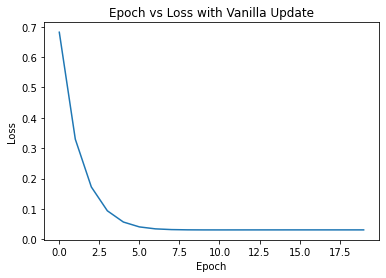

In [ ]:
plt.plot(range(epoch),loss_vanilla)
plt.title('Epoch vs Loss with Vanilla Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<h4>2.2 Momentum Update of Weights</h4>

In [ ]:
# ref: https://cs231n.github.io/neural-networks-3/
def momentum_update(x,y,w,epochs,eta,mu):
  '''Implement momentum update of weights: w[t] = w[t-1] + (momentum * moving average of gradients - learning rate * gradient of L w.r. weight)'''
  v=0
  total_loss = []
  for e in range(epochs): # for each epoch
    loss = []
    for i in range(len(x)): # for each data point, compute gradient and update weights
      forward_dict=forward_propagation(x[i],y[i],w)
      backward_dict=backward_propagation(x[i],y[i],w,forward_dict)
      gradients_list=list(backward_dict.values()) # list of dw1, dw2,..., dw9 values
      v = mu * v - eta * np.array(gradients_list)
      w = w + v

      # use updated weights to predict y given x, and obtain loss value
      final_y_pred=forward_propagation(x[i],y[i],w)
      loss.append(final_y_pred['loss'])
    total_loss.append(sum(loss)/len(loss)) # compute average loss per epoch

  return w,total_loss

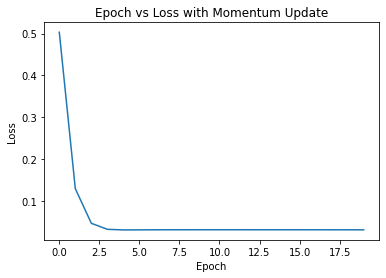

In [ ]:
w = [ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768, 0.00114524,  0.00684168,  0.02242521,  0.01296444]
epoch = 20

w_momentum, loss_momentum = momentum_update(X,y,w,epochs=epoch,eta=0.001, mu=0.5)

plt.plot(range(epoch),loss_momentum)
plt.title('Epoch vs Loss with Momentum Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.legend()
plt.show()

<h4>2.3 Adam Update of Weights</h4>

In [ ]:
# ref: https://cs231n.github.io/neural-networks-3/
# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
def adam_update(x,y,w,epochs,eta,beta1,beta2,eps=1e-8):
  '''Implement Adam update of weights using first moment and second moment estimates with bias correction'''
  m,v = 0, 0
  t = 1
  total_loss = []
  for e in range(epochs): # for each epoch
    loss = []
    for i in range(len(x)): # for each data point, compute gradient and update weights
      forward_dict=forward_propagation(x[i],y[i],w)
      backward_dict=backward_propagation(x[i],y[i],w,forward_dict)
      gradients_list=list(backward_dict.values()) # list of dw1, dw2,..., dw9 values
      m = beta1*m + (1-beta1)*np.array(gradients_list) # compute exponential moving average of gradient, with beta1 controlling the decay rate of the moving average
      mt = m / (1-beta1**t) # bias correction

      v = beta2*v + (1-beta2)*(np.array(gradients_list)**2) # compute exponential moving average of squared gradient, with beta2 controlling the decay rate of the moving average
      vt = v / (1-beta2**t) # bias correction

      w = w - eta * mt / (np.sqrt(vt) + eps)
      t = t + 1

      # use updated weights to predict y given x, and obtain loss value
      final_y_pred=forward_propagation(x[i],y[i],w)
      loss.append(final_y_pred['loss'])
    total_loss.append(sum(loss)/len(loss)) # compute average loss per epoch

  return w,total_loss

In [ ]:
w = [ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768, 0.00114524,  0.00684168,  0.02242521,  0.01296444]
epoch = 20

w_adam, loss_adam = adam_update(X,y,w,epochs=epoch,eta=0.001, beta1=0.9, beta2=0.99)
print(w_adam)
print(len(loss_adam))

[ 0.6908982   0.71031908 -0.99884809 -0.99471144 -0.99740866  1.00940934
  0.91187884  1.0043493   0.99612103]
20


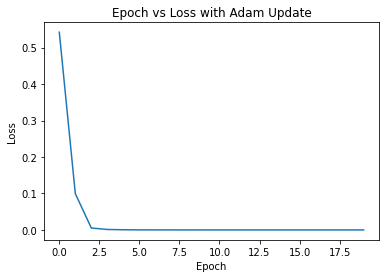

In [ ]:
plt.plot(range(epoch),loss_adam)
plt.title('Epoch vs Loss with Adam Update')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.legend()
plt.show()

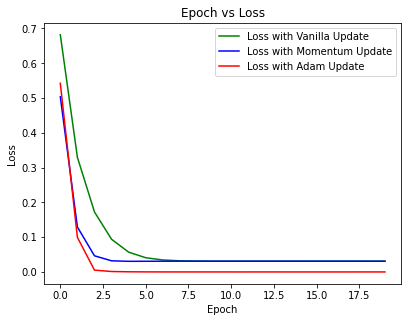

In [ ]:
# plot all 3 updates
plt.plot(range(epoch),loss_vanilla, 'g', label = 'Loss with Vanilla Update')
plt.plot(range(epoch),loss_momentum, 'b', label = 'Loss with Momentum Update')
plt.plot(range(epoch),loss_adam, 'r', label = 'Loss with Adam Update')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

>As expected, Adam appears to perform the best in updating weights that minimizes the error, followed by momentum and vanilla. 